In [1]:
%reload_ext autoreload
%autoreload

%reload_ext autoreload
%autoreload 2
import os
from pathlib import Path
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd

# Increase the resolution of all the plots below
plt.rcParams.update({"figure.dpi": 200,"figure.facecolor":"w","figure.figsize": (15,10)})

In [2]:
# (import) helper functions
dir_proj = Path("__file__").parent.absolute()
dir_rawdata = Path.joinpath(dir_proj.parent.absolute(), "data")
dir_prep = Path.joinpath(dir_proj,"results")
print(dir_rawdata)


c:\Users\juliu\Desktop\kiel\tremor_music_ap\data


In [3]:
# find all videos in path
f_list = os.listdir(dir_rawdata)
str_match = 'BS'
dir_patients = [s for s in f_list if str_match in s]

In [69]:
 # set params for epoch processing and plotting
from datetime import datetime


cfg_filter_window = [2,12]
cfg_freqs_oi = [2,10]
cfg_thresh_level_mp = .5

tmp_dir_patients = dir_patients[1:3]
for dir_sub in tmp_dir_patients:
    nms_files = os.listdir(Path.joinpath(dir_rawdata,dir_sub))
    print(nms_files[0])
    tmp = pd.read_excel(Path.joinpath(dir_rawdata,dir_sub,nms_files[0]),header=None)


BS0253 - 0 - prova 1.xlsx
BS0264 - 0 - prova 1.xlsx


In [70]:
x = tmp.iloc[:,0]
y = tmp.iloc[:,1]
z = tmp.iloc[:,2]


ConversionError: Failed to convert value(s) to axis units: array([datetime.datetime(1901, 11, 19, 20, 48),
       datetime.datetime(1901, 11, 24, 2, 32),
       datetime.datetime(1900, 1, 4, 2, 39),
       datetime.datetime(1901, 11, 23, 2, 7),
       datetime.datetime(1900, 1, 6, 11, 37),
       datetime.datetime(1901, 11, 16, 11, 25),
       datetime.datetime(1901, 11, 13, 2, 3),
       datetime.datetime(1900, 1, 15, 19, 25),
       datetime.datetime(1900, 2, 26, 12, 24),
       datetime.datetime(1900, 3, 27, 8, 32),
       datetime.datetime(1900, 3, 21, 22, 20),
       datetime.datetime(1900, 3, 20, 21, 55),
       datetime.datetime(1900, 3, 16, 12, 7),
       datetime.datetime(1900, 2, 18, 17, 13),
       datetime.datetime(1901, 11, 19, 20, 48),
       datetime.datetime(1901, 10, 3, 9, 29),
       datetime.datetime(1901, 8, 27, 6, 22),
       datetime.datetime(1901, 7, 27, 17, 57),
       datetime.datetime(1901, 8, 7, 2, 9),
       datetime.datetime(1901, 9, 21, 0, 27),
       datetime.datetime(1901, 11, 21, 5, 21),
       datetime.datetime(1900, 1, 24, 10, 56),
       datetime.datetime(1900, 2, 15, 20, 3),
       datetime.datetime(1900, 3, 6, 12, 3),
       datetime.datetime(1900, 3, 12, 2, 20),
       datetime.datetime(1900, 2, 23, 7, 5),
       datetime.datetime(1900, 1, 22, 18, 15),
       datetime.datetime(1900, 1, 3, 18, 31),
       datetime.datetime(1901, 11, 12, 21, 58),
       datetime.datetime(1901, 10, 25, 2, 19),
       datetime.datetime(1901, 10, 8, 3, 25),
       datetime.datetime(1901, 10, 1, 16, 47),
       datetime.datetime(1901, 9, 22, 4, 56),
       datetime.datetime(1901, 9, 15, 10, 10),
       datetime.datetime(1901, 9, 11, 16, 39),
       datetime.datetime(1901, 9, 20, 4, 6),
       datetime.datetime(1901, 9, 13, 5, 16),
       datetime.datetime(1901, 10, 1, 4, 35),
       datetime.datetime(1901, 11, 6, 23, 34),
       datetime.datetime(1900, 1, 6, 15, 41),
       datetime.datetime(1900, 1, 3, 6, 19),
       datetime.datetime(1900, 1, 7, 3, 54),
       datetime.datetime(1900, 1, 21, 5, 38),
       datetime.datetime(1900, 1, 8, 0, 15),
       datetime.datetime(1900, 1, 4, 10, 48),
       datetime.datetime(1900, 1, 13, 14, 31),
       datetime.datetime(1900, 1, 9, 8, 48),
       datetime.datetime(1900, 1, 6, 11, 37),
       datetime.datetime(1901, 11, 13, 6, 7),
       datetime.datetime(1901, 10, 20, 8, 23),
       datetime.datetime(1901, 10, 6, 22, 56),
       datetime.datetime(1901, 10, 15, 22, 35),
       datetime.datetime(1901, 10, 29, 3, 58),
       datetime.datetime(1901, 11, 2, 13, 46),
       datetime.datetime(1901, 11, 15, 6, 56), datetime.time(17, 17),
       datetime.datetime(1900, 1, 19, 0, 44),
       datetime.datetime(1900, 1, 22, 10, 7),
       datetime.datetime(1900, 1, 20, 13, 21),
       datetime.datetime(1900, 1, 15, 23, 29), datetime.time(5, 4),
       datetime.datetime(1901, 11, 20, 4, 56),
       datetime.datetime(1901, 11, 13, 10, 11),
       datetime.datetime(1901, 10, 25, 2, 19),
       datetime.datetime(1901, 10, 12, 13, 12),
       datetime.datetime(1901, 10, 1, 4, 35),
       datetime.datetime(1901, 10, 3, 13, 33),
       datetime.datetime(1901, 10, 17, 15, 17),
       datetime.datetime(1901, 11, 7, 11, 46),
       datetime.datetime(1901, 11, 23, 2, 7),
       datetime.datetime(1900, 1, 1, 17, 41),
       datetime.datetime(1901, 11, 11, 13, 25),
       datetime.datetime(1901, 11, 12, 17, 54),
       datetime.datetime(1901, 11, 20, 9, 1),
       datetime.datetime(1900, 1, 3, 14, 27),
       datetime.datetime(1900, 1, 8, 20, 35),
       datetime.datetime(1900, 1, 4, 14, 52),
       datetime.datetime(1901, 11, 21, 13, 30),
       datetime.datetime(1901, 11, 11, 1, 13),
       datetime.datetime(1901, 11, 11, 17, 29),
       datetime.datetime(1901, 11, 7, 19, 54),
       datetime.datetime(1901, 10, 27, 11, 17),
       datetime.datetime(1901, 10, 29, 16, 11),
       datetime.datetime(1901, 10, 31, 21, 4),
       datetime.datetime(1901, 11, 19, 0, 28),
       datetime.datetime(1900, 1, 17, 20, 15),
       datetime.datetime(1900, 1, 25, 7, 17),
       datetime.datetime(1900, 1, 22, 1, 58),
       datetime.datetime(1900, 1, 18, 0, 19),
       datetime.datetime(1900, 1, 15, 3, 9),
       datetime.datetime(1900, 1, 11, 17, 46),
       datetime.datetime(1900, 1, 19, 17, 0),
       datetime.datetime(1900, 1, 23, 10, 31),
       datetime.datetime(1900, 1, 14, 6, 48),
       datetime.datetime(1900, 1, 1, 17, 41),
       datetime.datetime(1901, 11, 7, 11, 46),
       datetime.datetime(1901, 10, 23, 5, 33),
       datetime.datetime(1901, 10, 12, 17, 17),
       datetime.datetime(1901, 10, 8, 15, 37),
       datetime.datetime(1901, 10, 21, 0, 39),
       datetime.datetime(1901, 11, 11, 9, 21),
       datetime.datetime(1900, 1, 5, 11, 13),
       datetime.datetime(1900, 1, 16, 19, 50),
       datetime.datetime(1900, 1, 15, 23, 29),
       datetime.datetime(1900, 1, 6, 15, 41),
       datetime.datetime(1901, 11, 23, 2, 7),
       datetime.datetime(1901, 11, 21, 17, 34),
       datetime.datetime(1900, 1, 1, 17, 41),
       datetime.datetime(1901, 11, 21, 9, 25),
       datetime.datetime(1901, 11, 14, 6, 32),
       datetime.datetime(1901, 11, 8, 4, 3),
       datetime.datetime(1901, 10, 27, 7, 13),
       datetime.datetime(1901, 10, 8, 7, 29),
       datetime.datetime(1901, 9, 26, 14, 43),
       datetime.datetime(1901, 10, 3, 21, 41),
       datetime.datetime(1901, 10, 24, 10, 2),
       datetime.datetime(1901, 11, 8, 16, 15),
       datetime.datetime(1901, 11, 10, 13, 0),
       datetime.datetime(1901, 11, 11, 1, 13),
       datetime.datetime(1901, 11, 13, 10, 11),
       datetime.datetime(1901, 11, 18, 20, 23),
       datetime.datetime(1901, 11, 21, 1, 17),
       datetime.datetime(1901, 11, 21, 13, 30),
       datetime.datetime(1900, 1, 2, 14, 2),
       datetime.datetime(1900, 1, 3, 6, 19), datetime.time(1, 0),
       datetime.datetime(1901, 11, 18, 16, 19),
       datetime.datetime(1901, 10, 31, 21, 4),
       datetime.datetime(1901, 10, 17, 7, 8),
       datetime.datetime(1901, 10, 13, 13, 37),
       datetime.datetime(1901, 10, 15, 10, 23),
       datetime.datetime(1901, 10, 23, 21, 50),
       datetime.datetime(1901, 10, 30, 4, 23),
       datetime.datetime(1901, 11, 8, 4, 3),
       datetime.datetime(1901, 11, 23, 22, 28),
       datetime.datetime(1900, 1, 5, 11, 13),
       datetime.datetime(1900, 1, 4, 6, 44),
       datetime.datetime(1900, 1, 1, 1, 25),
       datetime.datetime(1901, 11, 19, 4, 32),
       datetime.datetime(1901, 11, 20, 21, 13),
       datetime.datetime(1900, 1, 4, 6, 44),
       datetime.datetime(1900, 1, 8, 0, 15),
       datetime.datetime(1900, 1, 10, 13, 17), datetime.time(17, 17),
       datetime.datetime(1901, 11, 12, 13, 50),
       datetime.datetime(1901, 10, 28, 23, 54),
       datetime.datetime(1901, 10, 29, 8, 2),
       datetime.datetime(1901, 10, 30, 8, 27),
       datetime.datetime(1901, 11, 22, 1, 42),
       datetime.datetime(1900, 1, 11, 13, 42),
       datetime.datetime(1900, 1, 6, 19, 46),
       datetime.datetime(1901, 11, 18, 20, 23),
       datetime.datetime(1901, 11, 21, 13, 30),
       datetime.datetime(1901, 11, 19, 4, 32),
       datetime.datetime(1900, 1, 5, 7, 8),
       datetime.datetime(1900, 1, 8, 20, 35),
       datetime.datetime(1900, 1, 6, 15, 41),
       datetime.datetime(1900, 1, 2, 1, 50),
       datetime.datetime(1901, 11, 11, 9, 21),
       datetime.datetime(1901, 11, 12, 17, 54),
       datetime.datetime(1901, 11, 17, 3, 42),
       datetime.datetime(1901, 11, 15, 19, 9),
       datetime.datetime(1901, 11, 8, 8, 7),
       datetime.datetime(1901, 10, 29, 16, 11),
       datetime.datetime(1901, 10, 31, 8, 52),
       datetime.datetime(1901, 10, 31, 4, 48),
       datetime.datetime(1901, 11, 14, 10, 36),
       datetime.datetime(1901, 11, 19, 12, 40),
       datetime.datetime(1900, 1, 2, 9, 58),
       datetime.datetime(1901, 11, 21, 9, 25),
       datetime.datetime(1901, 11, 10, 4, 52),
       datetime.datetime(1901, 11, 3, 22, 19),
       datetime.datetime(1901, 10, 29, 12, 6),
       datetime.datetime(1901, 10, 22, 17, 21),
       datetime.datetime(1901, 10, 9, 20, 6),
       datetime.datetime(1901, 10, 14, 14, 2),
       datetime.datetime(1901, 10, 21, 4, 44),
       datetime.datetime(1901, 10, 27, 3, 9),
       datetime.datetime(1901, 11, 5, 15, 0),
       datetime.datetime(1901, 11, 9, 16, 40),
       datetime.datetime(1901, 11, 12, 1, 38),
       datetime.datetime(1901, 11, 20, 9, 1),
       datetime.datetime(1901, 11, 23, 6, 11),
       datetime.datetime(1900, 1, 7, 7, 58),
       datetime.datetime(1900, 1, 12, 10, 2),
       datetime.datetime(1900, 1, 10, 9, 13), datetime.time(5, 4),
       datetime.datetime(1901, 11, 19, 20, 48),
       datetime.datetime(1901, 11, 13, 10, 11),
       datetime.datetime(1901, 11, 1, 1, 9),
       datetime.datetime(1901, 11, 1, 21, 29),
       datetime.datetime(1901, 10, 29, 3, 58),
       datetime.datetime(1901, 11, 5, 23, 9),
       datetime.datetime(1901, 11, 21, 5, 21),
       datetime.datetime(1901, 11, 20, 21, 13),
       datetime.datetime(1901, 11, 18, 20, 23),
       datetime.datetime(1901, 11, 17, 7, 46),
       datetime.datetime(1901, 11, 19, 12, 40),
       datetime.datetime(1901, 11, 23, 14, 19),
       datetime.datetime(1900, 1, 1, 9, 33),
       datetime.datetime(1900, 1, 4, 10, 48),
       datetime.datetime(1900, 1, 3, 10, 23),
       datetime.datetime(1900, 1, 9, 0, 39),
       datetime.datetime(1900, 1, 3, 14, 27),
       datetime.datetime(1901, 11, 19, 20, 48),
       datetime.datetime(1901, 11, 15, 6, 56),
       datetime.datetime(1901, 11, 12, 21, 58),
       datetime.datetime(1901, 11, 1, 17, 25),
       datetime.datetime(1901, 10, 28, 15, 46),
       datetime.datetime(1901, 10, 26, 6, 48),
       datetime.datetime(1901, 10, 20, 4, 19),
       datetime.datetime(1901, 10, 20, 0, 15),
       datetime.datetime(1901, 10, 22, 17, 21),
       datetime.datetime(1901, 11, 14, 10, 36),
       datetime.datetime(1901, 11, 18, 12, 15),
       datetime.datetime(1901, 11, 19, 12, 40),
       datetime.datetime(1901, 11, 11, 21, 34),
       datetime.datetime(1901, 11, 12, 9, 46),
       datetime.datetime(1901, 11, 8, 16, 15),
       datetime.datetime(1901, 11, 13, 22, 23),
       datetime.datetime(1901, 11, 12, 13, 50),
       datetime.datetime(1901, 11, 15, 15, 5), datetime.time(1, 0),
       datetime.time(9, 8), datetime.datetime(1901, 11, 15, 23, 13),
       datetime.datetime(1901, 11, 13, 14, 15),
       datetime.datetime(1901, 10, 27, 3, 9),
       datetime.datetime(1901, 10, 18, 3, 29),
       datetime.datetime(1901, 10, 19, 20, 10),
       datetime.datetime(1901, 10, 29, 16, 11),
       datetime.datetime(1901, 10, 23, 1, 29),
       datetime.datetime(1901, 10, 21, 0, 39),
       datetime.datetime(1901, 10, 22, 9, 13),
       datetime.datetime(1901, 10, 27, 3, 9),
       datetime.datetime(1901, 11, 8, 16, 15),
       datetime.datetime(1900, 1, 3, 10, 23),
       datetime.datetime(1900, 1, 13, 2, 19),
       datetime.datetime(1900, 1, 19, 17, 0),
       datetime.datetime(1900, 1, 31, 1, 38),
       datetime.datetime(1900, 1, 27, 8, 7),
       datetime.datetime(1900, 1, 23, 6, 27),
       datetime.datetime(1900, 1, 18, 16, 35),
       datetime.datetime(1900, 1, 18, 0, 19),
       datetime.datetime(1900, 1, 12, 22, 15),
       datetime.datetime(1900, 1, 7, 7, 58),
       datetime.datetime(1901, 11, 23, 22, 28),
       datetime.datetime(1901, 11, 8, 16, 15),
       datetime.datetime(1901, 10, 16, 18, 56),
       datetime.datetime(1901, 10, 16, 10, 48),
       datetime.datetime(1901, 10, 18, 11, 37),
       datetime.datetime(1901, 10, 18, 15, 41),
       datetime.datetime(1901, 10, 28, 3, 33),
       datetime.datetime(1901, 11, 6, 3, 13),
       datetime.datetime(1901, 11, 17, 7, 46),
       datetime.datetime(1901, 11, 20, 9, 1),
       datetime.datetime(1900, 1, 1, 1, 25),
       datetime.datetime(1901, 11, 21, 13, 30),
       datetime.datetime(1901, 11, 17, 3, 42),
       datetime.datetime(1901, 11, 16, 7, 21),
       datetime.datetime(1901, 11, 16, 3, 17),
       datetime.datetime(1901, 11, 20, 4, 56),
       datetime.datetime(1901, 11, 18, 4, 7),
       datetime.datetime(1901, 11, 21, 21, 38),
       datetime.datetime(1901, 11, 18, 20, 23),
       datetime.datetime(1901, 11, 7, 3, 38),
       datetime.datetime(1901, 10, 31, 0, 44),
       datetime.datetime(1901, 11, 2, 9, 42),
       datetime.datetime(1901, 11, 12, 1, 38),
       datetime.datetime(1901, 11, 13, 22, 23),
       datetime.datetime(1901, 11, 12, 9, 46),
       datetime.datetime(1901, 11, 16, 19, 34),
       datetime.datetime(1901, 11, 19, 0, 28),
       datetime.datetime(1901, 11, 12, 13, 50),
       datetime.datetime(1901, 10, 30, 16, 35),
       datetime.datetime(1901, 10, 28, 23, 54),
       datetime.datetime(1901, 10, 25, 14, 31),
       datetime.datetime(1901, 10, 24, 14, 6),
       datetime.datetime(1901, 10, 27, 11, 17),
       datetime.datetime(1901, 11, 1, 21, 29),
       datetime.datetime(1901, 11, 10, 21, 9),
       datetime.datetime(1901, 11, 18, 8, 11),
       datetime.datetime(1901, 11, 22, 22, 3),
       datetime.datetime(1901, 11, 16, 3, 17),
       datetime.datetime(1901, 11, 14, 14, 40),
       datetime.datetime(1901, 11, 7, 15, 50),
       datetime.datetime(1901, 11, 1, 5, 13),
       datetime.datetime(1901, 11, 1, 13, 21),
       datetime.datetime(1901, 11, 17, 3, 42),
       datetime.datetime(1900, 1, 2, 1, 50),
       datetime.datetime(1900, 1, 8, 16, 31),
       datetime.datetime(1900, 1, 2, 22, 10),
       datetime.datetime(1900, 1, 11, 5, 33),
       datetime.datetime(1900, 1, 11, 17, 46),
       datetime.datetime(1900, 1, 10, 5, 8),
       datetime.datetime(1900, 1, 5, 11, 13),
       datetime.datetime(1901, 11, 17, 11, 50),
       datetime.datetime(1901, 10, 31, 4, 48),
       datetime.datetime(1901, 10, 11, 20, 56),
       datetime.datetime(1901, 9, 26, 2, 31),
       datetime.datetime(1901, 10, 10, 4, 14),
       datetime.datetime(1901, 10, 17, 11, 13),
       datetime.datetime(1901, 10, 27, 7, 13),
       datetime.datetime(1901, 11, 5, 15, 0),
       datetime.datetime(1901, 11, 14, 6, 32),
       datetime.datetime(1900, 1, 7, 16, 6),
       datetime.datetime(1900, 1, 18, 4, 23),
       datetime.datetime(1900, 1, 22, 14, 11),
       datetime.datetime(1900, 1, 23, 22, 44),
       datetime.datetime(1900, 1, 28, 4, 27),
       datetime.datetime(1900, 1, 25, 7, 17),
       datetime.datetime(1900, 1, 21, 9, 42),
       datetime.datetime(1900, 1, 12, 5, 58),
       datetime.datetime(1901, 11, 24, 6, 36),
       datetime.datetime(1901, 11, 11, 9, 21),
       datetime.datetime(1901, 11, 4, 10, 31),
       datetime.datetime(1901, 10, 29, 8, 2),
       datetime.datetime(1901, 11, 9, 12, 36),
       datetime.datetime(1901, 11, 11, 1, 13),
       datetime.datetime(1901, 10, 23, 21, 50),
       datetime.datetime(1901, 10, 21, 4, 44),
       datetime.datetime(1901, 10, 23, 17, 46),
       datetime.datetime(1901, 10, 26, 23, 4),
       datetime.datetime(1901, 11, 5, 10, 56),
       datetime.datetime(1901, 11, 2, 13, 46),
       datetime.datetime(1901, 11, 15, 15, 5),
       datetime.datetime(1900, 1, 2, 14, 2),
       datetime.datetime(1900, 1, 7, 7, 58),
       datetime.datetime(1900, 1, 2, 1, 50),
       datetime.datetime(1901, 11, 24, 6, 36),
       datetime.datetime(1901, 11, 19, 20, 48),
       datetime.datetime(1901, 11, 23, 14, 19),
       datetime.datetime(1901, 11, 17, 3, 42),
       datetime.datetime(1901, 11, 12, 5, 42),
       datetime.datetime(1901, 11, 1, 9, 17),
       datetime.datetime(1901, 10, 22, 1, 4),
       datetime.datetime(1901, 10, 12, 21, 21),
       datetime.datetime(1901, 10, 7, 15, 12),
       datetime.datetime(1901, 10, 14, 5, 54),
       datetime.datetime(1901, 10, 21, 16, 56),
       datetime.datetime(1901, 10, 20, 4, 19),
       datetime.datetime(1901, 10, 18, 23, 50),
       datetime.datetime(1901, 10, 30, 16, 35),
       datetime.datetime(1901, 11, 2, 5, 38),
       datetime.datetime(1901, 10, 29, 20, 15),
       datetime.datetime(1901, 10, 29, 12, 6),
       datetime.datetime(1901, 11, 9, 12, 36),
       datetime.datetime(1901, 11, 12, 1, 38),
       datetime.datetime(1901, 11, 20, 13, 5),
       datetime.datetime(1900, 1, 4, 23, 0),
       datetime.datetime(1900, 1, 4, 18, 56),
       datetime.datetime(1900, 1, 6, 3, 29),
       datetime.datetime(1900, 1, 5, 23, 25),
       datetime.datetime(1900, 1, 5, 7, 8),
       datetime.datetime(1900, 1, 7, 3, 54),
       datetime.datetime(1900, 1, 8, 20, 35),
       datetime.datetime(1900, 1, 4, 2, 39),
       datetime.datetime(1901, 11, 23, 6, 11),
       datetime.datetime(1901, 11, 21, 21, 38),
       datetime.datetime(1901, 11, 14, 18, 44),
       datetime.datetime(1901, 11, 8, 16, 15),
       datetime.datetime(1901, 11, 9, 12, 36),
       datetime.datetime(1901, 11, 12, 1, 38),
       datetime.datetime(1901, 11, 11, 1, 13),
       datetime.datetime(1901, 11, 14, 2, 27),
       datetime.datetime(1901, 11, 21, 21, 38),
       datetime.datetime(1901, 11, 23, 10, 15),
       datetime.datetime(1901, 11, 21, 13, 30),
       datetime.datetime(1901, 11, 23, 6, 11),
       datetime.datetime(1900, 1, 6, 11, 37),
       datetime.datetime(1900, 1, 12, 1, 54),
       datetime.datetime(1900, 1, 8, 0, 15),
       datetime.datetime(1901, 11, 24, 2, 32),
       datetime.datetime(1901, 11, 16, 11, 25),
       datetime.datetime(1901, 11, 11, 9, 21),
       datetime.datetime(1901, 11, 6, 19, 29),
       datetime.datetime(1901, 11, 6, 23, 34),
       datetime.datetime(1901, 11, 1, 5, 13),
       datetime.datetime(1901, 11, 5, 23, 9),
       datetime.datetime(1901, 10, 29, 12, 6),
       datetime.datetime(1901, 10, 26, 19, 0),
       datetime.datetime(1901, 10, 28, 23, 54),
       datetime.datetime(1901, 10, 31, 21, 4),
       datetime.datetime(1901, 10, 28, 19, 50),
       datetime.datetime(1901, 10, 19, 20, 10),
       datetime.datetime(1901, 10, 21, 8, 48),
       datetime.datetime(1901, 10, 23, 21, 50),
       datetime.datetime(1901, 11, 2, 21, 54),
       datetime.datetime(1901, 11, 22, 22, 3), datetime.time(17, 17),
       datetime.datetime(1901, 11, 21, 17, 34),
       datetime.datetime(1901, 11, 16, 15, 30),
       datetime.datetime(1901, 11, 12, 17, 54),
       datetime.datetime(1901, 11, 7, 15, 50),
       datetime.datetime(1901, 11, 8, 8, 7),
       datetime.datetime(1901, 11, 5, 2, 48),
       datetime.datetime(1901, 11, 4, 22, 44),
       datetime.datetime(1901, 11, 7, 11, 46),
       datetime.datetime(1901, 11, 11, 5, 17),
       datetime.datetime(1901, 11, 20, 17, 9),
       datetime.datetime(1901, 11, 21, 1, 17),
       datetime.datetime(1901, 11, 20, 13, 5),
       datetime.datetime(1901, 11, 21, 13, 30),
       datetime.datetime(1901, 11, 18, 8, 11),
       datetime.datetime(1901, 11, 16, 7, 21),
       datetime.datetime(1901, 11, 16, 7, 21),
       datetime.datetime(1901, 11, 11, 5, 17),
       datetime.datetime(1901, 11, 16, 15, 30),
       datetime.datetime(1901, 11, 13, 22, 23),
       datetime.datetime(1901, 11, 11, 9, 21),
       datetime.datetime(1901, 11, 9, 8, 31),
       datetime.datetime(1901, 11, 16, 7, 21),
       datetime.datetime(1901, 11, 17, 7, 46),
       datetime.datetime(1901, 11, 17, 7, 46),
       datetime.datetime(1901, 11, 15, 2, 52),
       datetime.datetime(1901, 11, 14, 14, 40),
       datetime.datetime(1901, 11, 12, 13, 50),
       datetime.datetime(1901, 11, 8, 4, 3),
       datetime.datetime(1901, 11, 17, 7, 46),
       datetime.datetime(1900, 1, 2, 5, 54),
       datetime.datetime(1900, 1, 20, 5, 13),
       datetime.datetime(1900, 1, 12, 22, 15),
       datetime.datetime(1900, 1, 2, 5, 54),
       datetime.datetime(1901, 11, 23, 10, 15),
       datetime.datetime(1900, 1, 10, 5, 8),
       datetime.datetime(1900, 1, 2, 5, 54),
       datetime.datetime(1901, 11, 19, 12, 40),
       datetime.datetime(1901, 11, 13, 14, 15),
       datetime.datetime(1901, 11, 10, 21, 9),
       datetime.datetime(1901, 11, 2, 5, 38),
       datetime.datetime(1901, 10, 26, 23, 4),
       datetime.datetime(1901, 10, 20, 16, 31),
       datetime.datetime(1901, 10, 26, 19, 0),
       datetime.datetime(1901, 11, 16, 19, 34), datetime.time(17, 17),
       datetime.datetime(1900, 1, 6, 7, 33),
       datetime.datetime(1901, 11, 20, 4, 56),
       datetime.datetime(1901, 11, 14, 14, 40),
       datetime.datetime(1901, 11, 9, 20, 44),
       datetime.datetime(1901, 11, 5, 23, 9),
       datetime.datetime(1901, 11, 9, 0, 23),
       datetime.datetime(1901, 11, 10, 4, 52),
       datetime.datetime(1901, 11, 5, 10, 56),
       datetime.datetime(1901, 11, 2, 17, 50),
       datetime.datetime(1901, 10, 29, 3, 58),
       datetime.datetime(1901, 10, 31, 17, 0),
       datetime.datetime(1901, 10, 31, 8, 52),
       datetime.datetime(1901, 10, 26, 10, 52),
       datetime.datetime(1901, 10, 26, 10, 52),
       datetime.datetime(1901, 10, 31, 12, 56),
       datetime.datetime(1901, 11, 3, 22, 19),
       datetime.datetime(1901, 11, 10, 8, 56),
       datetime.datetime(1901, 11, 12, 13, 50),
       datetime.datetime(1901, 11, 11, 5, 17),
       datetime.datetime(1901, 11, 23, 22, 28),
       datetime.datetime(1900, 1, 5, 3, 4),
       datetime.datetime(1900, 1, 9, 0, 39),
       datetime.datetime(1900, 1, 1, 13, 37),
       datetime.datetime(1900, 1, 2, 5, 54),
       datetime.datetime(1901, 11, 23, 18, 23),
       datetime.datetime(1901, 11, 15, 6, 56),
       datetime.datetime(1901, 11, 23, 2, 7),
       datetime.datetime(1900, 1, 5, 23, 25),
       datetime.datetime(1900, 1, 3, 2, 15), datetime.time(13, 12),
       datetime.datetime(1901, 11, 16, 23, 38), datetime.time(21, 21),
       datetime.datetime(1900, 1, 1, 21, 46), datetime.time(5, 4),
       datetime.datetime(1901, 11, 22, 5, 46),
       datetime.datetime(1901, 11, 19, 8, 36),
       datetime.datetime(1901, 11, 19, 0, 28),
       datetime.datetime(1901, 11, 19, 0, 28),
       datetime.datetime(1901, 11, 20, 13, 5),
       datetime.datetime(1900, 1, 2, 9, 58),
       datetime.datetime(1901, 11, 19, 12, 40),
       datetime.datetime(1901, 11, 17, 15, 54),
       datetime.datetime(1901, 11, 15, 2, 52),
       datetime.datetime(1901, 11, 12, 21, 58),
       datetime.datetime(1901, 11, 11, 1, 13),
       datetime.datetime(1901, 11, 17, 7, 46),
       datetime.datetime(1901, 11, 14, 22, 48),
       datetime.datetime(1901, 11, 9, 4, 27),
       datetime.datetime(1901, 11, 1, 1, 9),
       datetime.datetime(1901, 10, 30, 12, 31),
       datetime.datetime(1901, 10, 25, 14, 31),
       datetime.datetime(1901, 10, 30, 16, 35),
       datetime.datetime(1901, 11, 1, 9, 17),
       datetime.datetime(1901, 10, 28, 15, 46),
       datetime.datetime(1901, 11, 10, 8, 56),
       datetime.datetime(1901, 11, 17, 15, 54),
       datetime.datetime(1901, 11, 18, 8, 11),
       datetime.datetime(1900, 1, 4, 14, 52),
       datetime.datetime(1900, 1, 11, 9, 37),
       datetime.datetime(1900, 1, 12, 14, 6),
       datetime.datetime(1901, 11, 21, 1, 17),
       datetime.datetime(1901, 11, 16, 23, 38),
       datetime.datetime(1901, 11, 8, 8, 7),
       datetime.datetime(1901, 10, 26, 10, 52),
       datetime.datetime(1901, 10, 21, 21, 0),
       datetime.datetime(1901, 10, 23, 17, 46),
       datetime.datetime(1901, 10, 26, 19, 0),
       datetime.datetime(1901, 10, 28, 7, 38),
       datetime.datetime(1901, 11, 11, 1, 13),
       datetime.datetime(1901, 11, 21, 1, 17),
       datetime.datetime(1900, 1, 2, 18, 6),
       datetime.datetime(1900, 1, 10, 5, 8),
       datetime.datetime(1900, 1, 12, 10, 2),
       datetime.datetime(1900, 1, 9, 21, 0),
       datetime.datetime(1900, 1, 9, 0, 39),
       datetime.datetime(1900, 1, 2, 9, 58),
       datetime.datetime(1901, 11, 21, 9, 25),
       datetime.datetime(1901, 11, 9, 8, 31),
       datetime.datetime(1901, 11, 11, 17, 29),
       datetime.datetime(1901, 11, 18, 4, 7),
       datetime.datetime(1901, 11, 18, 0, 3),
       datetime.datetime(1901, 11, 16, 15, 30),
       datetime.datetime(1901, 11, 19, 12, 40),
       datetime.datetime(1901, 11, 17, 11, 50),
       datetime.datetime(1901, 11, 21, 9, 25),
       datetime.datetime(1901, 11, 18, 20, 23),
       datetime.datetime(1901, 11, 18, 16, 19),
       datetime.datetime(1900, 1, 1, 17, 41),
       datetime.datetime(1901, 11, 20, 4, 56),
       datetime.datetime(1901, 11, 20, 4, 56),
       datetime.datetime(1900, 1, 2, 9, 58),
       datetime.datetime(1900, 1, 9, 16, 56),
       datetime.datetime(1900, 1, 9, 16, 56),
       datetime.datetime(1900, 1, 5, 3, 4),
       datetime.datetime(1901, 11, 22, 9, 50),
       datetime.datetime(1901, 11, 14, 14, 40),
       datetime.datetime(1901, 11, 11, 17, 29),
       datetime.datetime(1901, 11, 6, 15, 25),
       datetime.datetime(1901, 11, 2, 9, 42),
       datetime.datetime(1901, 11, 1, 5, 13),
       datetime.datetime(1901, 11, 9, 0, 23),
       datetime.datetime(1901, 11, 16, 3, 17),
       datetime.datetime(1901, 11, 16, 19, 34),
       datetime.datetime(1901, 11, 13, 6, 7),
       datetime.datetime(1901, 11, 16, 3, 17),
       datetime.datetime(1901, 11, 22, 22, 3),
       datetime.datetime(1901, 11, 16, 11, 25),
       datetime.datetime(1901, 11, 11, 1, 13),
       datetime.datetime(1901, 11, 7, 11, 46),
       datetime.datetime(1901, 11, 15, 15, 5),
       datetime.datetime(1901, 11, 14, 2, 27),
       datetime.datetime(1901, 11, 11, 21, 34),
       datetime.datetime(1901, 11, 14, 10, 36),
       datetime.datetime(1901, 11, 11, 5, 17),
       datetime.datetime(1901, 11, 12, 17, 54),
       datetime.datetime(1901, 11, 7, 19, 54),
       datetime.datetime(1901, 11, 7, 23, 58),
       datetime.datetime(1901, 11, 4, 10, 31),
       datetime.datetime(1901, 11, 9, 0, 23),
       datetime.datetime(1901, 11, 10, 8, 56),
       datetime.datetime(1901, 11, 15, 6, 56),
       datetime.datetime(1901, 11, 10, 4, 52),
       datetime.datetime(1901, 11, 9, 0, 23),
       datetime.datetime(1901, 11, 19, 8, 36),
       datetime.datetime(1901, 11, 14, 14, 40),
       datetime.datetime(1901, 11, 7, 7, 42),
       datetime.datetime(1901, 11, 8, 16, 15),
       datetime.datetime(1901, 11, 12, 9, 46),
       datetime.datetime(1901, 11, 19, 0, 28),
       datetime.datetime(1901, 11, 5, 23, 9),
       datetime.datetime(1901, 11, 11, 5, 17),
       datetime.datetime(1901, 11, 10, 0, 48),
       datetime.datetime(1901, 11, 4, 14, 36),
       datetime.datetime(1901, 11, 2, 13, 46),
       datetime.datetime(1901, 11, 5, 23, 9),
       datetime.datetime(1901, 11, 8, 12, 11),
       datetime.datetime(1901, 11, 16, 15, 30),
       datetime.datetime(1901, 11, 18, 20, 23),
       datetime.datetime(1900, 1, 5, 19, 21),
       datetime.datetime(1900, 1, 7, 7, 58),
       datetime.datetime(1900, 1, 7, 12, 2),
       datetime.datetime(1900, 1, 8, 4, 19),
       datetime.datetime(1900, 1, 10, 1, 4),
       datetime.datetime(1900, 1, 3, 18, 31),
       datetime.datetime(1901, 11, 18, 12, 15),
       datetime.datetime(1901, 11, 11, 13, 25),
       datetime.datetime(1901, 10, 28, 19, 50),
       datetime.datetime(1901, 11, 2, 13, 46),
       datetime.datetime(1901, 11, 8, 12, 11),
       datetime.datetime(1901, 11, 7, 19, 54),
       datetime.datetime(1901, 11, 10, 17, 5),
       datetime.datetime(1901, 11, 11, 1, 13),
       datetime.datetime(1901, 11, 16, 11, 25),
       datetime.datetime(1901, 11, 14, 6, 32),
       datetime.datetime(1901, 11, 18, 16, 19),
       datetime.datetime(1901, 11, 17, 7, 46),
       datetime.datetime(1901, 11, 14, 6, 32),
       datetime.datetime(1901, 11, 14, 14, 40),
       datetime.datetime(1901, 11, 18, 4, 7),
       datetime.datetime(1901, 11, 10, 13, 0),
       datetime.datetime(1901, 11, 15, 19, 9),
       datetime.datetime(1901, 11, 10, 13, 0),
       datetime.datetime(1901, 11, 10, 13, 0),
       datetime.datetime(1901, 11, 18, 4, 7),
       datetime.datetime(1901, 11, 20, 17, 9), datetime.time(9, 8),
       datetime.time(5, 4), datetime.datetime(1900, 1, 1, 13, 37),
       datetime.datetime(1901, 11, 15, 19, 9),
       datetime.datetime(1901, 11, 18, 8, 11), datetime.time(1, 0),
       datetime.datetime(1900, 1, 6, 3, 29),
       datetime.datetime(1900, 1, 8, 20, 35),
       datetime.datetime(1900, 1, 4, 18, 56),
       datetime.datetime(1901, 11, 22, 17, 59),
       datetime.datetime(1901, 11, 21, 1, 17),
       datetime.datetime(1901, 11, 17, 15, 54),
       datetime.datetime(1901, 11, 17, 19, 59),
       datetime.datetime(1901, 11, 17, 19, 59),
       datetime.datetime(1901, 11, 14, 6, 32),
       datetime.datetime(1901, 11, 14, 22, 48),
       datetime.datetime(1901, 11, 18, 8, 11),
       datetime.datetime(1901, 11, 14, 10, 36),
       datetime.datetime(1901, 11, 10, 0, 48),
       datetime.datetime(1901, 10, 30, 8, 27),
       datetime.datetime(1901, 10, 26, 2, 44),
       datetime.datetime(1901, 11, 4, 2, 23),
       datetime.datetime(1901, 11, 10, 4, 52),
       datetime.datetime(1901, 11, 10, 21, 9),
       datetime.datetime(1901, 11, 7, 23, 58),
       datetime.datetime(1901, 11, 7, 3, 38),
       datetime.datetime(1901, 11, 5, 23, 9),
       datetime.datetime(1901, 11, 7, 23, 58),
       datetime.datetime(1901, 11, 2, 13, 46),
       datetime.datetime(1901, 10, 31, 12, 56),
       datetime.datetime(1901, 11, 1, 13, 21),
       datetime.datetime(1901, 11, 4, 6, 27),
       datetime.datetime(1901, 11, 4, 14, 36),
       datetime.datetime(1901, 11, 3, 22, 19),
       datetime.datetime(1901, 11, 9, 12, 36),
       datetime.datetime(1901, 11, 7, 23, 58),
       datetime.datetime(1901, 11, 9, 16, 40),
       datetime.datetime(1901, 11, 12, 21, 58),
       datetime.datetime(1901, 11, 8, 20, 19),
       datetime.datetime(1901, 11, 18, 0, 3),
       datetime.datetime(1901, 11, 22, 22, 3),
       datetime.datetime(1901, 11, 21, 17, 34),
       datetime.datetime(1900, 1, 1, 9, 33),
       datetime.datetime(1900, 1, 6, 15, 41),
       datetime.datetime(1900, 1, 2, 5, 54), datetime.time(21, 21),
       datetime.datetime(1900, 1, 1, 21, 46),
       datetime.datetime(1900, 1, 4, 23, 0),
       datetime.datetime(1900, 1, 6, 23, 50),
       datetime.datetime(1900, 1, 6, 7, 33),
       datetime.datetime(1900, 1, 10, 9, 13),
       datetime.datetime(1900, 1, 4, 18, 56), datetime.time(13, 12),
       datetime.datetime(1901, 11, 23, 18, 23),
       datetime.datetime(1900, 1, 3, 14, 27), datetime.time(17, 17),
       datetime.datetime(1901, 11, 19, 16, 44),
       datetime.datetime(1901, 11, 18, 4, 7),
       datetime.datetime(1901, 11, 16, 7, 21),
       datetime.datetime(1900, 1, 1, 5, 29), datetime.time(13, 12),
       datetime.datetime(1901, 11, 20, 9, 1),
       datetime.datetime(1901, 11, 12, 1, 38),
       datetime.datetime(1901, 11, 11, 21, 34),
       datetime.datetime(1901, 11, 10, 21, 9),
       datetime.datetime(1901, 11, 12, 21, 58),
       datetime.datetime(1901, 11, 5, 6, 52),
       datetime.datetime(1901, 11, 1, 17, 25),
       datetime.datetime(1901, 11, 1, 5, 13),
       datetime.datetime(1901, 11, 1, 9, 17),
       datetime.datetime(1901, 11, 4, 14, 36),
       datetime.datetime(1901, 10, 26, 23, 4),
       datetime.datetime(1901, 11, 5, 23, 9),
       datetime.datetime(1901, 11, 7, 11, 46),
       datetime.datetime(1901, 11, 10, 4, 52),
       datetime.datetime(1901, 11, 10, 17, 5),
       datetime.datetime(1901, 11, 11, 1, 13),
       datetime.datetime(1901, 11, 9, 16, 40),
       datetime.datetime(1901, 11, 5, 19, 5),
       datetime.datetime(1901, 11, 7, 11, 46),
       datetime.datetime(1901, 11, 17, 7, 46),
       datetime.datetime(1901, 11, 23, 10, 15),
       datetime.datetime(1901, 11, 16, 19, 34),
       datetime.datetime(1901, 11, 14, 6, 32),
       datetime.datetime(1901, 10, 29, 12, 6),
       datetime.datetime(1901, 10, 13, 21, 46),
       datetime.datetime(1901, 10, 12, 21, 21),
       datetime.datetime(1901, 10, 28, 11, 42),
       datetime.datetime(1901, 11, 14, 6, 32),
       datetime.datetime(1901, 11, 17, 3, 42),
       datetime.datetime(1901, 11, 22, 17, 59), datetime.time(13, 12),
       datetime.datetime(1901, 11, 22, 22, 3),
       datetime.datetime(1901, 11, 24, 6, 36), datetime.time(21, 21),
       datetime.datetime(1901, 11, 20, 9, 1),
       datetime.datetime(1901, 11, 19, 8, 36),
       datetime.datetime(1901, 11, 19, 20, 48),
       datetime.datetime(1901, 11, 17, 7, 46),
       datetime.datetime(1901, 11, 15, 11, 1),
       datetime.datetime(1901, 11, 14, 22, 48),
       datetime.datetime(1901, 11, 15, 15, 5),
       datetime.datetime(1901, 11, 16, 23, 38),
       datetime.datetime(1900, 1, 2, 9, 58),
       datetime.datetime(1900, 1, 4, 18, 56),
       datetime.datetime(1900, 1, 11, 9, 37),
       datetime.datetime(1900, 1, 12, 18, 11),
       datetime.datetime(1900, 1, 8, 4, 19),
       datetime.datetime(1900, 1, 3, 10, 23),
       datetime.datetime(1901, 11, 22, 5, 46), datetime.time(1, 0),
       datetime.datetime(1901, 11, 23, 18, 23),
       datetime.datetime(1901, 11, 19, 0, 28),
       datetime.datetime(1901, 11, 22, 9, 50),
       datetime.datetime(1901, 11, 21, 5, 21),
       datetime.datetime(1901, 11, 7, 15, 50),
       datetime.datetime(1901, 11, 12, 21, 58),
       datetime.datetime(1901, 11, 11, 9, 21),
       datetime.datetime(1901, 11, 13, 2, 3),
       datetime.datetime(1901, 11, 22, 17, 59),
       datetime.datetime(1900, 1, 2, 1, 50),
       datetime.datetime(1901, 11, 21, 21, 38),
       datetime.datetime(1901, 11, 22, 1, 42),
       datetime.datetime(1901, 11, 13, 6, 7),
       datetime.datetime(1901, 11, 12, 9, 46),
       datetime.datetime(1901, 11, 18, 0, 3), datetime.time(9, 8),
       datetime.datetime(1901, 11, 16, 15, 30),
       datetime.datetime(1901, 11, 9, 20, 44),
       datetime.datetime(1901, 11, 9, 0, 23),
       datetime.datetime(1901, 11, 7, 15, 50),
       datetime.datetime(1901, 11, 3, 18, 15),
       datetime.datetime(1901, 11, 9, 16, 40),
       datetime.datetime(1901, 11, 11, 5, 17),
       datetime.datetime(1901, 11, 5, 2, 48),
       datetime.datetime(1901, 10, 30, 4, 23),
       datetime.datetime(1901, 10, 24, 18, 11),
       datetime.datetime(1901, 10, 21, 4, 44),
       datetime.datetime(1901, 10, 29, 20, 15),
       datetime.datetime(1901, 11, 12, 17, 54),
       datetime.datetime(1901, 11, 15, 15, 5),
       datetime.datetime(1901, 11, 15, 11, 1),
       datetime.datetime(1901, 11, 19, 16, 44), datetime.time(21, 21),
       datetime.datetime(1901, 11, 24, 2, 32),
       datetime.datetime(1901, 11, 17, 7, 46),
       datetime.datetime(1901, 11, 19, 4, 32),
       datetime.datetime(1901, 11, 22, 5, 46),
       datetime.datetime(1901, 11, 18, 16, 19),
       datetime.datetime(1901, 11, 8, 16, 15),
       datetime.datetime(1901, 11, 3, 10, 7),
       datetime.datetime(1901, 11, 8, 12, 11),
       datetime.datetime(1901, 11, 15, 11, 1),
       datetime.datetime(1901, 11, 19, 8, 36),
       datetime.datetime(1900, 1, 1, 9, 33),
       datetime.datetime(1900, 1, 11, 9, 37),
       datetime.datetime(1900, 1, 12, 22, 15),
       datetime.datetime(1900, 1, 2, 9, 58),
       datetime.datetime(1901, 11, 19, 20, 48),
       datetime.datetime(1901, 11, 16, 19, 34), datetime.time(9, 8),
       datetime.datetime(1900, 1, 5, 7, 8),
       datetime.datetime(1901, 11, 22, 17, 59),
       datetime.datetime(1901, 11, 23, 22, 28),
       datetime.datetime(1901, 11, 16, 3, 17),
       datetime.datetime(1901, 11, 18, 0, 3),
       datetime.datetime(1901, 11, 18, 4, 7),
       datetime.datetime(1901, 11, 16, 19, 34),
       datetime.datetime(1901, 11, 13, 14, 15),
       datetime.datetime(1901, 11, 17, 7, 46),
       datetime.datetime(1901, 11, 18, 20, 23),
       datetime.datetime(1901, 11, 17, 15, 54),
       datetime.datetime(1901, 11, 20, 4, 56),
       datetime.datetime(1901, 11, 13, 22, 23),
       datetime.datetime(1901, 11, 13, 10, 11),
       datetime.datetime(1901, 11, 18, 8, 11),
       datetime.datetime(1901, 11, 10, 17, 5),
       datetime.datetime(1901, 11, 12, 17, 54),
       datetime.datetime(1901, 11, 12, 13, 50),
       datetime.datetime(1901, 11, 13, 10, 11),
       datetime.datetime(1901, 11, 14, 18, 44),
       datetime.datetime(1901, 11, 12, 5, 42),
       datetime.datetime(1901, 11, 12, 17, 54),
       datetime.datetime(1901, 11, 12, 9, 46),
       datetime.datetime(1901, 11, 8, 8, 7),
       datetime.datetime(1901, 10, 27, 7, 13),
       datetime.datetime(1901, 10, 27, 23, 29),
       datetime.datetime(1901, 11, 5, 15, 0),
       datetime.datetime(1901, 11, 4, 14, 36),
       datetime.datetime(1901, 11, 6, 15, 25),
       datetime.datetime(1901, 11, 11, 1, 13),
       datetime.datetime(1901, 11, 15, 15, 5),
       datetime.datetime(1901, 11, 11, 21, 34),
       datetime.datetime(1901, 11, 8, 4, 3),
       datetime.datetime(1901, 11, 9, 4, 27),
       datetime.datetime(1901, 11, 12, 13, 50),
       datetime.datetime(1901, 11, 11, 13, 25),
       datetime.datetime(1901, 11, 5, 6, 52),
       datetime.datetime(1901, 11, 2, 5, 38),
       datetime.datetime(1901, 11, 10, 13, 0),
       datetime.datetime(1901, 11, 13, 18, 19),
       datetime.datetime(1901, 11, 18, 12, 15),
       datetime.datetime(1901, 11, 20, 9, 1),
       datetime.datetime(1901, 11, 22, 22, 3),
       datetime.datetime(1900, 1, 1, 13, 37),
       datetime.datetime(1900, 1, 3, 22, 35),
       datetime.datetime(1900, 1, 2, 1, 50),
       datetime.datetime(1900, 1, 2, 1, 50),
       datetime.datetime(1900, 1, 1, 5, 29),
       datetime.datetime(1901, 11, 19, 8, 36),
       datetime.datetime(1901, 11, 15, 23, 13),
       datetime.datetime(1901, 11, 15, 6, 56),
       datetime.datetime(1901, 11, 15, 23, 13),
       datetime.datetime(1901, 11, 22, 5, 46),
       datetime.datetime(1900, 1, 1, 21, 46),
       datetime.datetime(1900, 1, 1, 13, 37),
       datetime.datetime(1900, 1, 3, 18, 31),
       datetime.datetime(1901, 11, 22, 9, 50),
       datetime.datetime(1901, 11, 20, 21, 13),
       datetime.datetime(1901, 11, 22, 13, 54),
       datetime.datetime(1901, 11, 18, 16, 19),
       datetime.datetime(1901, 11, 22, 17, 59),
       datetime.datetime(1901, 11, 17, 15, 54),
       datetime.datetime(1901, 11, 18, 12, 15),
       datetime.datetime(1901, 11, 17, 15, 54),
       datetime.datetime(1901, 11, 15, 15, 5),
       datetime.datetime(1901, 11, 18, 4, 7),
       datetime.datetime(1901, 11, 20, 4, 56),
       datetime.datetime(1901, 11, 19, 12, 40),
       datetime.datetime(1901, 11, 18, 0, 3),
       datetime.datetime(1901, 11, 16, 19, 34),
       datetime.datetime(1901, 11, 13, 18, 19),
       datetime.datetime(1901, 11, 11, 5, 17),
       datetime.datetime(1901, 11, 12, 17, 54),
       datetime.datetime(1901, 11, 7, 23, 58),
       datetime.datetime(1901, 11, 8, 8, 7),
       datetime.datetime(1901, 10, 31, 12, 56),
       datetime.datetime(1901, 11, 7, 23, 58),
       datetime.datetime(1901, 11, 8, 20, 19),
       datetime.datetime(1901, 11, 9, 12, 36),
       datetime.datetime(1901, 11, 6, 11, 21),
       datetime.datetime(1901, 11, 7, 23, 58),
       datetime.datetime(1901, 11, 11, 5, 17),
       datetime.datetime(1901, 11, 8, 4, 3),
       datetime.datetime(1901, 11, 3, 18, 15),
       datetime.datetime(1901, 10, 31, 8, 52),
       datetime.datetime(1901, 11, 4, 14, 36),
       datetime.datetime(1901, 11, 12, 9, 46),
       datetime.datetime(1901, 11, 14, 14, 40),
       datetime.datetime(1900, 1, 2, 22, 10),
       datetime.datetime(1900, 1, 7, 3, 54),
       datetime.datetime(1900, 1, 3, 14, 27),
       datetime.datetime(1901, 11, 21, 9, 25),
       datetime.datetime(1901, 11, 11, 13, 25),
       datetime.datetime(1901, 11, 11, 21, 34),
       datetime.datetime(1901, 11, 9, 16, 40),
       datetime.datetime(1901, 11, 16, 23, 38),
       datetime.datetime(1901, 11, 22, 9, 50),
       datetime.datetime(1901, 11, 22, 9, 50),
       datetime.datetime(1901, 11, 16, 3, 17),
       datetime.datetime(1901, 11, 20, 4, 56),
       datetime.datetime(1901, 11, 20, 17, 9),
       datetime.datetime(1901, 11, 22, 1, 42),
       datetime.datetime(1901, 11, 14, 14, 40),
       datetime.datetime(1901, 11, 14, 14, 40),
       datetime.datetime(1901, 11, 17, 19, 59),
       datetime.datetime(1901, 11, 12, 21, 58),
       datetime.datetime(1901, 11, 16, 11, 25),
       datetime.datetime(1901, 11, 19, 16, 44),
       datetime.datetime(1901, 11, 23, 10, 15),
       datetime.datetime(1901, 11, 21, 5, 21),
       datetime.datetime(1901, 11, 24, 2, 32),
       datetime.datetime(1900, 1, 1, 21, 46),
       datetime.datetime(1900, 1, 7, 20, 10),
       datetime.datetime(1900, 1, 5, 3, 4), datetime.time(13, 12),
       datetime.datetime(1900, 1, 5, 15, 17), datetime.time(21, 21),
       datetime.datetime(1900, 1, 2, 1, 50),
       datetime.datetime(1900, 1, 1, 5, 29),
       datetime.datetime(1901, 11, 9, 8, 31),
       datetime.datetime(1901, 11, 5, 19, 5),
       datetime.datetime(1901, 11, 3, 22, 19),
       datetime.datetime(1901, 11, 9, 16, 40),
       datetime.datetime(1901, 11, 15, 15, 5),
       datetime.datetime(1901, 11, 23, 6, 11),
       datetime.datetime(1900, 1, 10, 1, 4),
       datetime.datetime(1900, 1, 7, 3, 54),
       datetime.datetime(1900, 1, 1, 1, 25),
       datetime.datetime(1900, 1, 2, 1, 50),
       datetime.datetime(1901, 11, 20, 4, 56),
       datetime.datetime(1901, 11, 16, 11, 25),
       datetime.datetime(1901, 11, 15, 2, 52),
       datetime.datetime(1901, 11, 5, 2, 48),
       datetime.datetime(1901, 10, 30, 8, 27),
       datetime.datetime(1901, 11, 4, 2, 23),
       datetime.datetime(1901, 11, 4, 22, 44),
       datetime.datetime(1901, 11, 8, 12, 11),
       datetime.datetime(1901, 11, 4, 10, 31),
       datetime.datetime(1901, 11, 13, 14, 15),
       datetime.datetime(1901, 11, 20, 9, 1),
       datetime.datetime(1901, 11, 19, 4, 32),
       datetime.datetime(1901, 11, 9, 12, 36),
       datetime.datetime(1901, 11, 6, 11, 21),
       datetime.datetime(1901, 11, 12, 17, 54),
       datetime.datetime(1901, 11, 9, 20, 44),
       datetime.datetime(1901, 11, 15, 15, 5),
       datetime.datetime(1901, 11, 21, 9, 25),
       datetime.datetime(1901, 11, 22, 13, 54), datetime.time(13, 12),
       datetime.datetime(1901, 11, 21, 9, 25),
       datetime.datetime(1901, 11, 18, 20, 23),
       datetime.datetime(1901, 11, 13, 14, 15),
       datetime.datetime(1901, 11, 11, 17, 29),
       datetime.datetime(1901, 11, 12, 21, 58),
       datetime.datetime(1901, 11, 19, 12, 40),
       datetime.datetime(1901, 11, 24, 2, 32),
       datetime.datetime(1900, 1, 6, 15, 41),
       datetime.datetime(1900, 1, 4, 14, 52),
       datetime.datetime(1900, 1, 4, 23, 0),
       datetime.datetime(1900, 1, 1, 21, 46),
       datetime.datetime(1901, 11, 15, 15, 5),
       datetime.datetime(1901, 11, 14, 14, 40),
       datetime.datetime(1901, 11, 21, 9, 25),
       datetime.datetime(1901, 11, 24, 2, 32),
       datetime.datetime(1900, 1, 1, 1, 25),
       datetime.datetime(1900, 1, 4, 6, 44),
       datetime.datetime(1900, 1, 5, 19, 21),
       datetime.datetime(1901, 11, 22, 9, 50), datetime.time(5, 4),
       datetime.datetime(1901, 11, 24, 6, 36),
       datetime.datetime(1901, 11, 19, 4, 32),
       datetime.datetime(1901, 11, 19, 4, 32),
       datetime.datetime(1901, 11, 14, 18, 44),
       datetime.datetime(1901, 11, 7, 7, 42),
       datetime.datetime(1901, 11, 11, 17, 29),
       datetime.datetime(1901, 11, 13, 10, 11),
       datetime.datetime(1901, 11, 21, 1, 17), datetime.time(9, 8),
       datetime.datetime(1901, 11, 22, 1, 42),
       datetime.datetime(1901, 11, 18, 12, 15),
       datetime.datetime(1901, 11, 14, 18, 44),
       datetime.datetime(1901, 11, 14, 10, 36),
       datetime.datetime(1901, 11, 13, 10, 11),
       datetime.datetime(1901, 11, 11, 17, 29),
       datetime.datetime(1901, 11, 22, 22, 3), datetime.time(21, 21),
       datetime.datetime(1901, 11, 19, 8, 36),
       datetime.datetime(1901, 11, 20, 13, 5),
       datetime.datetime(1901, 11, 19, 0, 28),
       datetime.datetime(1901, 11, 8, 12, 11),
       datetime.datetime(1901, 10, 29, 20, 15),
       datetime.datetime(1901, 11, 4, 2, 23),
       datetime.datetime(1901, 11, 1, 17, 25),
       datetime.datetime(1901, 11, 4, 14, 36),
       datetime.datetime(1901, 11, 5, 10, 56),
       datetime.datetime(1901, 11, 6, 23, 34),
       datetime.datetime(1901, 11, 8, 20, 19),
       datetime.datetime(1901, 11, 7, 11, 46),
       datetime.datetime(1901, 11, 5, 10, 56),
       datetime.datetime(1901, 11, 12, 21, 58)], dtype=object)

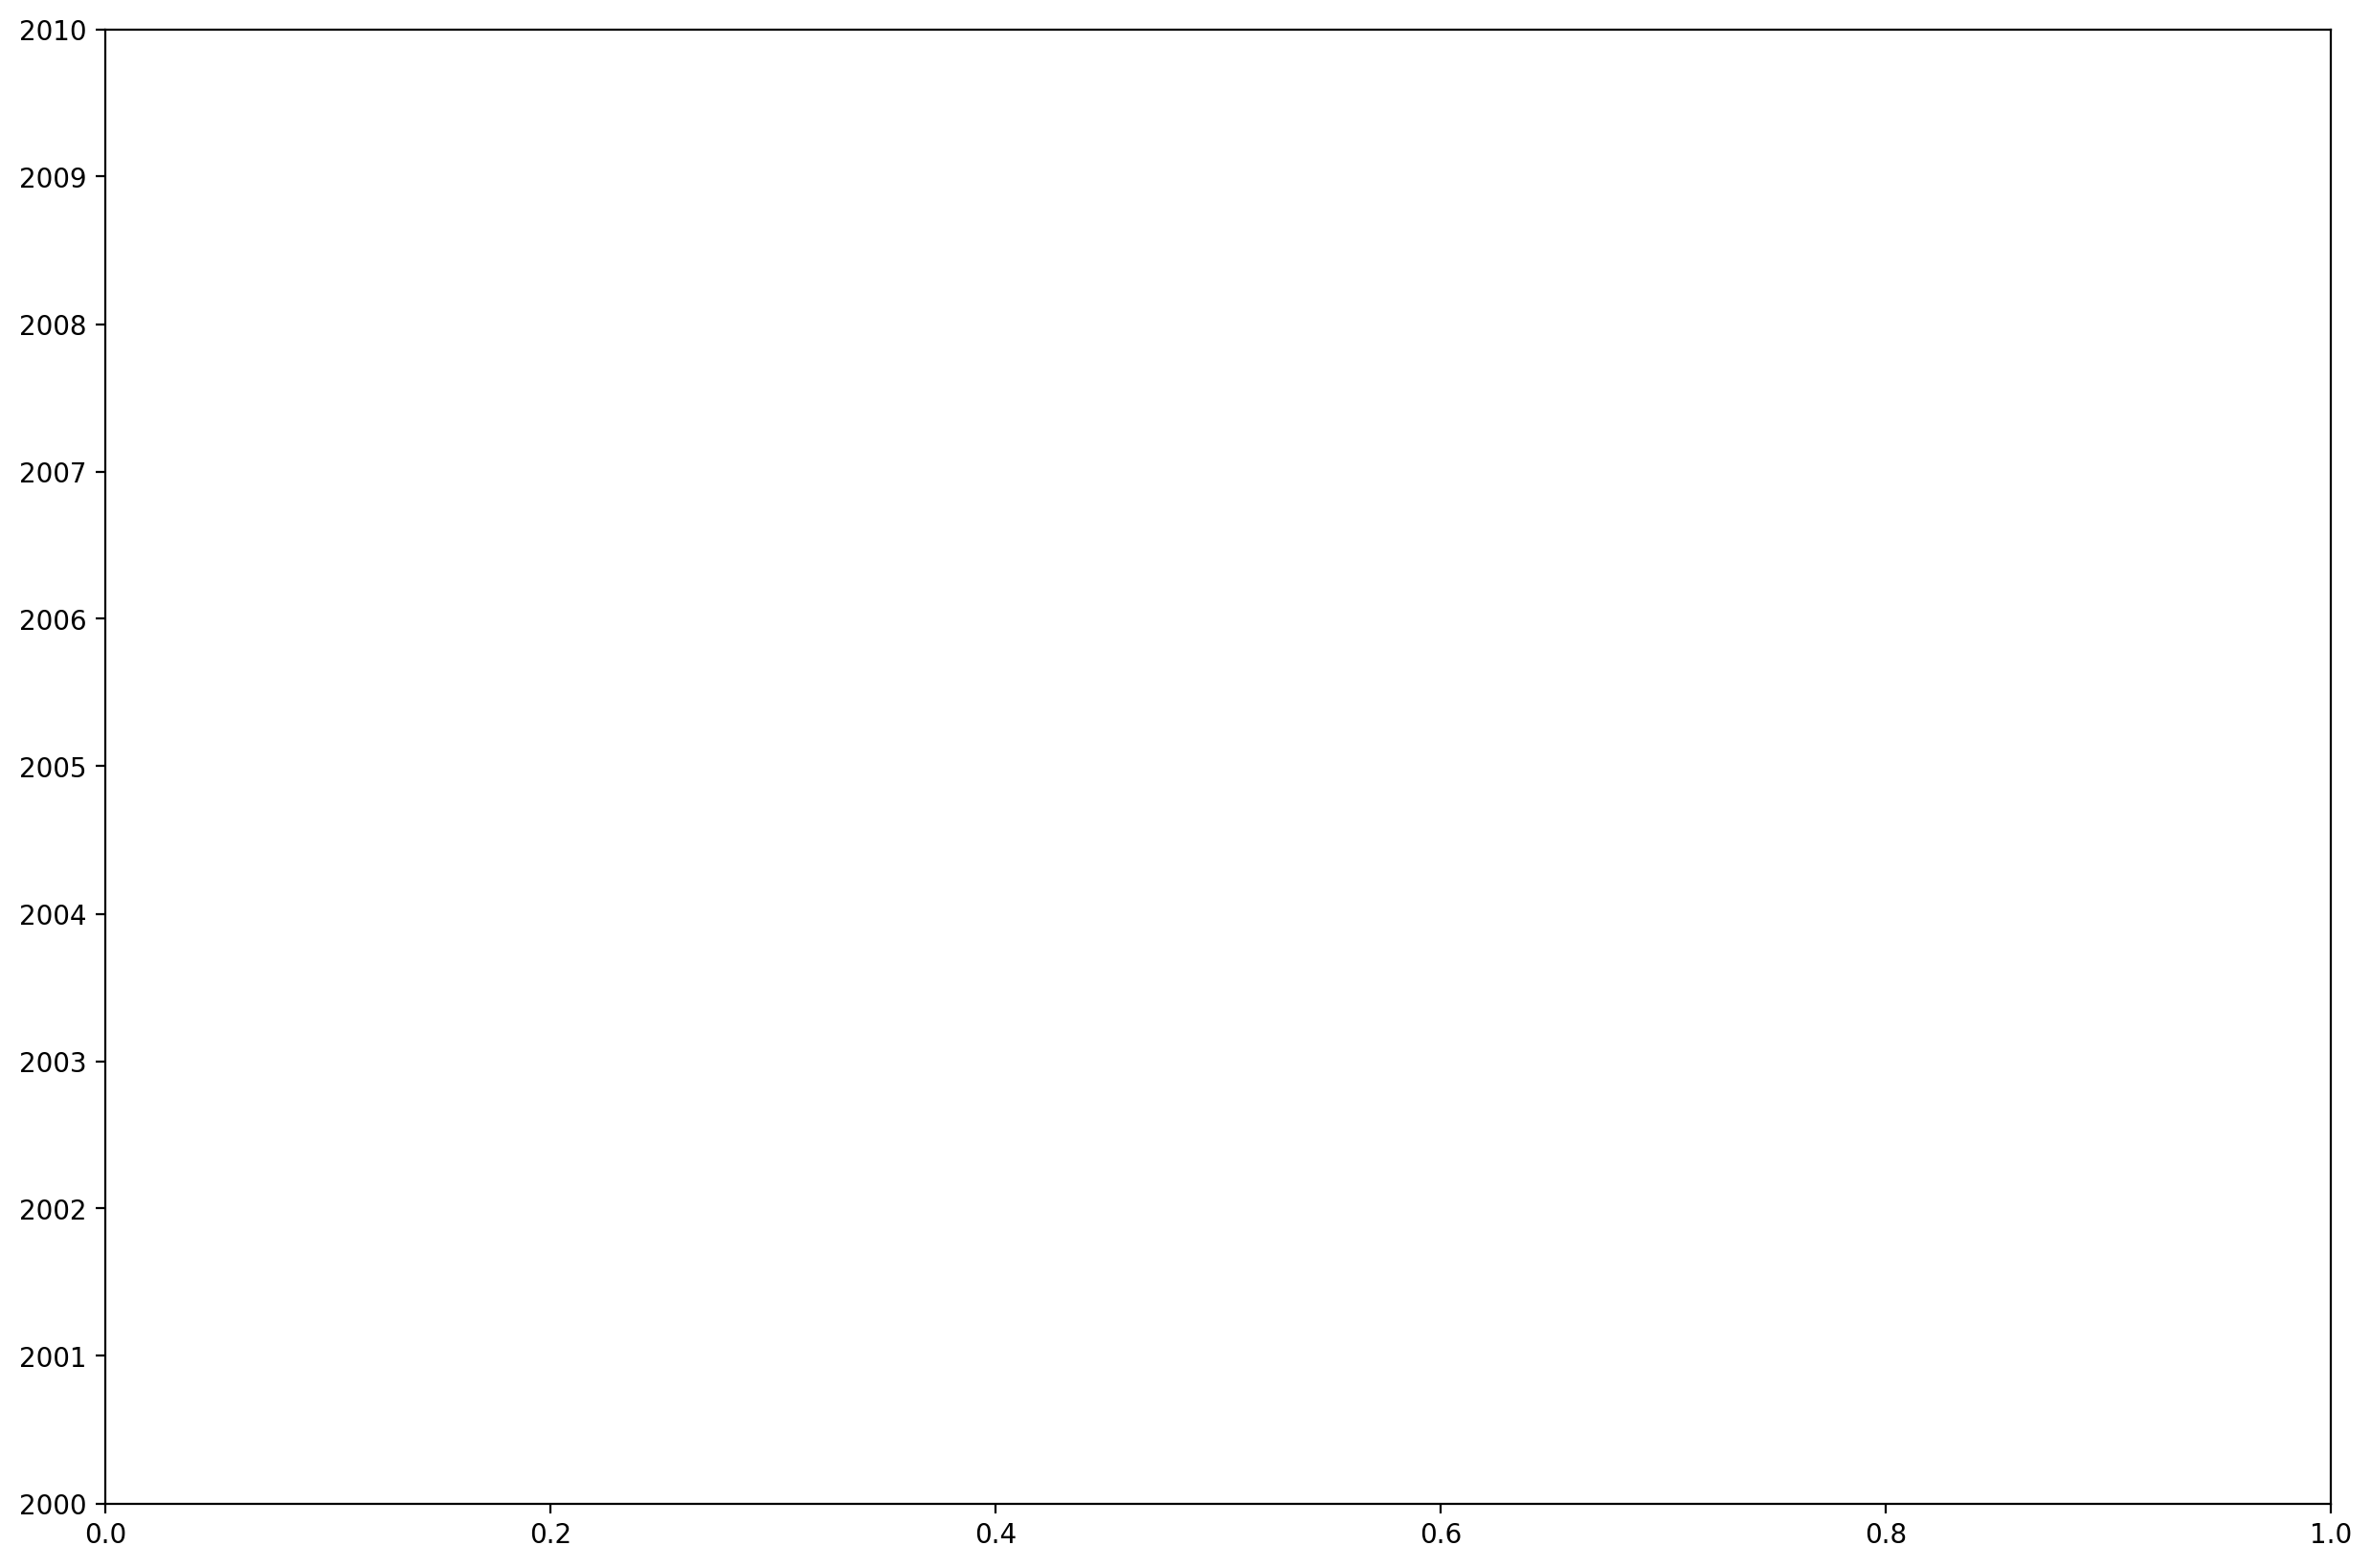

In [68]:
plt.plot(z)